In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString, Point
import math
import re
import numpy as np
from heapq import heappush, heappop
import networkx as nx
from itertools import permutations

In [3]:
# Data Preparation
data_x = {
    "Point": [
        "Start", 2618, 5662, "End"
    ],
    "Latitude": [
        53.49, 53.23946428739349, 53.06532601857299, 52.98485
    ],
    "Longitude": [
        -2.25, -2.335034109499439, -2.2089309462982634, -2.27032
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 24 minutes 9 seconds", 
        "0 days 0 hours 17 minutes 53 seconds", "0 days 0 hours 8 minutes 36 seconds"
    ],
    "Avg Speed": [
        0, 69.48197367330529, 69.30009076778624, 68.68124444904674
    ],
    "Distance": [
        0, 28.423914295792443, 21.110318323633713, 9.845445412628182
    ],
    "Wind Speed": [
        "-", 2.68, 2.68, 2.68
    ],
    "Wind Direction": [
        "-", 108, 108, 108
    ],
    "Battery Left": [
        "-", 26.032186497212887, 35.66267543189187, 74.43680308933571
    ]
}

data_y = {
    "Point": [
        "Start", 1973, 2335, 599, 24, 1600, 3728, 2038, 5772, 4814, 4731, 7465, 2464, 902, 8427, "End"
    ],
    "Latitude": [
        55.953, 55.846200704448485, 55.68714929217446, 55.55657394604759, 
        55.45274395573584, 55.22033414997413, 55.09788991362563, 
        54.86544035165556, 54.65453981880042, 54.5124172728162, 
        54.361373008443955, 54.1846758953888, 53.97865480643307, 
        53.86076924964234, 53.645975848325435, 53.49
    ],
    "Longitude": [
        -3.191, -3.233065003496521, -3.152069318399036, -3.069139841633005, 
        -2.986937896945639, -2.8723048127657567, -2.699583930567485, 
        -2.700680012339909, -2.6348272570309037, -2.6293083044973766, 
        -2.5184645566022876, -2.5415860988263654, -2.6308405144193463, 
        -2.656252689297168, -2.460270624567931, -2.25
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 10 minutes 14 seconds", 
        "0 days 0 hours 15 minutes 31 seconds", "0 days 0 hours 13 minutes 0 seconds", 
        "0 days 0 hours 10 minutes 37 seconds", "0 days 0 hours 22 minutes 47 seconds", 
        "0 days 0 hours 14 minutes 48 seconds", "0 days 0 hours 21 minutes 56 seconds", 
        "0 days 0 hours 20 minutes 12 seconds", "0 days 0 hours 13 minutes 19 seconds", 
        "0 days 0 hours 15 minutes 25 seconds", "0 days 0 hours 16 minutes 40 seconds", 
        "0 days 0 hours 20 minutes 4 seconds", "0 days 0 hours 11 minutes 8 seconds", 
        "0 days 0 hours 23 minutes 1 seconds", "0 days 0 hours 19 minutes 12 seconds"
    ],
    "Avg Speed": [
        0, 68.77663505513863, 69.19368965217056, 69.03676240943481, 
        68.81994066037859, 69.45061110767774, 69.15457364099558, 
        69.42938542210098, 69.38032896295988, 69.05955014861645, 
        69.18803129438196, 69.24872017390351, 69.37633588690369, 
        68.87563378305283, 69.45631479302894, 69.40939070981055
    ],
    "Distance": [
        0, 12.161630085996466, 18.39714487953959, 15.424711036372134, 
        12.652768269472825, 26.84040852987764, 17.48604552290924, 
        25.847306612607458, 23.82863749927303, 15.8073071802628, 
        18.261139065399078, 19.705093708671658, 23.63675173197674, 
        13.213483615245044, 27.137832488097377, 22.21720340100267
    ],
    "Wind Speed": [
        "-", 6.69, 0.45, 0.45, 6.22, 5.84, 7.2, 3.58, 5.15, 6.8, 
        6.44, 4.53, 3.71, 4.22, 0.89, 3.09
    ],
    "Wind Direction": [
        "-", 220, 208, 195, 209, 207, 220, 196, 195, 218, 
        237, 250, 185, 188, 205, 220
    ],
    "Battery Left": [
        "-", 72.62909711123477, 50.133631033088385, 54.75968843968528, 
        61.59308094622405, 22.076501256749737, 42.92522954676473, 
        37.49196343243434, 29.580834217253642, 54.68983774170408, 
        47.39121479700312, 57.30136417985143, 45.74766655062982, 
        62.03287126724612, 11.896781512938604, 25.625000279218337
    ]
}

data3 = {
    "Point": [
        "Start", 1825, 1821, 8670, 1125, 3660, 626, 1360, 5819, 126, 2597, 4534, 3733, 419, "End"
    ],
    "Latitude": [
        53.49, 53.2597348907701, 53.21408450945209, 53.132692832393474, 52.95298239036829, 
        52.835768710523624, 52.70204585174369, 52.56283948035825, 52.410963816536864, 
        52.35079713206578, 52.1819878577974, 52.087215223218976, 51.90090840203291, 
        51.715469169511415, 51.5
    ],
    "Longitude": [
        -2.25, -2.106117691658813, -1.8125330949486038, -1.700954993659633, 
        -1.5230341187694378, -1.4484306787417793, -1.2138449007730667, 
        -1.1062249774532757, -0.9295634075280299, -0.811328498202359, 
        -0.6844964051387628, -0.6727365380638632, -0.5140920158826354, 
        -0.2781763150137291, -0.15
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 23 minutes 12 seconds", 
        "0 days 0 hours 17 minutes 10 seconds", "0 days 0 hours 9 minutes 48 seconds", 
        "0 days 0 hours 19 minutes 41 seconds", "0 days 0 hours 11 minutes 45 seconds", 
        "0 days 0 hours 18 minutes 23 seconds", "0 days 0 hours 14 minutes 25 seconds", 
        "0 days 0 hours 17 minutes 30 seconds", "0 days 0 hours 8 minutes 46 seconds", 
        "0 days 0 hours 17 minutes 29 seconds", "0 days 0 hours 8 minutes 51 seconds", 
        "0 days 0 hours 19 minutes 49 seconds", "0 days 0 hours 22 minutes 15 seconds", 
        "0 days 0 hours 22 minutes 3 seconds"
    ],
    "Avg Speed": [
        0, 69.46066495827723, 69.271114810419, 68.72262800759235, 69.36431950629208, 
        68.93407707049994, 69.3189273401977, 69.13148882279029, 69.28469571106888, 
        68.57075514204811, 69.28401520997464, 68.58436622338017, 69.36858666949153, 
        69.43749357749884, 69.48570948999009
    ],
    "Distance": [
        0, 27.32544290013056, 20.1869575177186, 11.713768951087149, 23.254946898063178, 
        13.961360215993668, 21.683394280285295, 17.098277429440813, 20.695086266397436, 
        10.448053135108637, 20.659952707202144, 10.568758196764412, 23.391246616923464, 
        26.234557047559413, 25.54182453543089
    ],
    "Wind Speed": [
        "-", 2.06, 5.03, 4.95, 4.17, 4.63, 5.14, 4.7, 3.13, 2.68, 4.69, 0.89, 3.09, 3.09, 3.6
    ],
    "Wind Direction": [
        "-", 200, 224, 227, 227, 210, 200, 225, 217, 217, 233, 199, 220, 220, 240
    ],
    "Battery Left": [
        "-", 22.116705101753272, 34.6452023905261, 65.16440909808989, 33.64765731675337, 
        61.8761983077702, 29.869003772090966, 46.734988578594425, 39.27608812620262, 
        67.9006318210986, 40.08903335253572, 73.92978780664343, 30.19352011344841, 
        21.497351788017134, 27.103128665153367
    ]
}

data4 = {
    "Point": [
        "Start", 935, 5161, 5852, 304, 4746, 651, 2404, 387, 1017, 9283, 
        334, 4947, 3249, 412, 253, 2799, 1825, 5662, 2269, 3837, 941, 
        827, 7568, 3679, 4081, 454, 4512, 6191, 1770, 452, 699, 782, "End"
    ],
    "Latitude": [
        55.86029, 55.74634852507462, 55.60884323212862, 55.49543935494863, 
        55.337677876809074, 55.18730490506853, 55.050347759165895, 
        54.87885481335387, 54.703851742746124, 54.460012119060956, 
        54.343704746507946, 54.24026402699399, 54.12229389404159, 
        53.938657046528306, 53.813763150681595, 53.60290927711701, 
        53.4506194184933, 53.2597348907701, 53.06532601857299, 
        52.97017065487948, 52.84670269006989, 52.71697867981222, 
        52.645770256352826, 52.5061354457665, 52.37076006212805, 
        52.257701988463225, 52.061473459103844, 51.84260722488872, 
        51.66232523737515, 51.5423490164423, 51.31650756318197, 
        51.22895099661824, 51.029119212369885, 50.82963
    ],
    "Longitude": [
        -4.25, -4.117396343868701, -4.060494574307324, -3.941694410222885, 
        -3.7230645529286495, -3.6924435346267845, -3.5876824680071735, 
        -3.373269606024623, -3.167904338803554, -3.058328612948994, 
        -2.8914561257756484, -2.714974253824624, -2.6626259402511376, 
        -2.4147904331362096, -2.268246469760454, -2.278210344601378, 
        -2.1124845394121152, -2.106117691658813, -2.2089309462982634, 
        -2.0605497393078824, -1.9623982668799753, -1.6774539593436515, 
        -1.5823595905610928, -1.4011317756434263, -1.2613293252172406, 
        -1.2075609156637839, -1.035437302653964, -0.9047462417080707, 
        -0.7518237422381358, -0.5663929548694595, -0.4482710234352485, 
        -0.5066408319388502, -0.33588980939464896, -0.14047
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 12 minutes 45 seconds",
        "0 days 0 hours 13 minutes 13 seconds", "0 days 0 hours 12 minutes 20 seconds",
        "0 days 0 hours 18 minutes 54 seconds", "0 days 0 hours 14 minutes 12 seconds",
        "0 days 0 hours 14 minutes 1 second", "0 days 0 hours 19 minutes 54 seconds",
        "0 days 0 hours 19 minutes 55 seconds", "0 days 0 hours 23 minutes 47 seconds",
        "0 days 0 hours 14 minutes 13 seconds", "0 days 0 hours 13 minutes 43 seconds",
        "0 days 0 hours 11 minutes 24 seconds", "0 days 0 hours 22 minutes 7 seconds",
        "0 days 0 hours 14 minutes 14 seconds", "0 days 0 hours 19 minutes 54 seconds",
        "0 days 0 hours 17 minutes 3 seconds", "0 days 0 hours 17 minutes 59 seconds",
        "0 days 0 hours 19 minutes 19 seconds", "0 days 0 hours 12 minutes 13 seconds",
        "0 days 0 hours 12 minutes 49 seconds", "0 days 0 hours 20 minutes 21 seconds",
        "0 days 0 hours 8 minutes 30 seconds", "0 days 0 hours 16 minutes 43 seconds",
        "0 days 0 hours 14 minutes 59 seconds", "0 days 0 hours 10 minutes 59 seconds",
        "0 days 0 hours 21 minutes 0 seconds", "0 days 0 hours 21 minutes 57 seconds",
        "0 days 0 hours 19 minutes 11 seconds", "0 days 0 hours 15 minutes 38 seconds",
        "0 days 0 hours 22 minutes 24 seconds", "0 days 0 hours 8 minutes 53 seconds",
        "0 days 0 hours 21 minutes 22 seconds", "0 days 0 hours 22 minutes 30 seconds"
    ],
    "Avg Speed": [
        0, 69.01858897787685, 69.05338118555683, 68.98550499934845, 
        69.33781763301968, 69.11889369651482, 69.10726464438017, 
        69.37111339967028, 69.37165758569273, 69.47374207135545, 
        69.1194153928499, 69.08721420461237, 68.90142434981497, 
        69.43422436916663, 69.12086070707815, 69.3711042707145, 
        69.26583713019427, 69.30420783229296, 69.35204434592423, 
        68.97558820547462, 69.02375538106384, 69.38512853166112, 
        68.52662717259129, 69.25125023896923, 69.1649019955286, 
        68.8599166272544, 69.40391985838538, 69.42988052976861, 
        69.34748749720062, 69.1992640896947, 69.44122845377203, 
        68.58972606369942, 69.41429892491178, 69.49603635642823
    ],
    "Distance": [
        0, 15.139286529007778, 15.700584019446024, 14.657613456787212, 
        22.318988981238068, 16.83289787907912, 16.62224694756909, 
        23.47267946186857, 23.49494172872917, 28.018118753129816, 
        16.849888889215514, 16.23212980443518, 13.552777262038514, 
        26.05670203826109, 16.88629487559582, 23.455050225440477, 
        20.168139914205135, 21.229596599647515, 22.677890260989845, 
        14.507471039521526, 15.225296259881748, 23.98626377579531, 
        10.187686469742145, 19.774977010951, 17.787660185582872, 
        13.092030606673827, 24.77805427026221, 25.932578554346474, 
        22.64219821680803, 18.492925634615112, 26.41391390017347, 
        10.548666017604925, 25.213435279031657, 26.069555104279186
    ],
    "Wind Speed": [
        "-", 2.29, 2.19, 2.05, 1.37, 1.52, 1.38, 3.65, 2.81, 1.82, 
        2.12, 3.04, 0.45, 4.05, 3.94, 3.54, 3.09, 3.09, 1.79, 4.16, 
        4.47, 4.57, 4.54, 1.79, 4.79, 4.88, 0.89, 6.12, 0.45, 7.72, 
        5.66, 5.66, 5.66, 7.2
    ],
    "Wind Direction": [
        "-", 234, 217, 221, 280, 308, 284, 273, 256, 284, 
        272, 261, 354, 281, 278, 281, 250, 250, 283, 307, 
        311, 309, 297, 0, 277, 266, 332, 245, 292, 260, 240, 
        240, 240, 240
    ],
    "Battery Left": [
        "-", 55.35727652353421, 56.92022470717657, 57.10935430489312, 
        33.76789464005292, 53.61272664696332, 54.572084390781576, 
        34.87360516399908, 40.85827675661672, 27.047484474743786, 
        54.30992567743505, 55.58155170838265, 65.61549134501963, 
        23.904869133871035, 59.060133049653814, 44.033234129185956, 
        50.09566342406182, 46.17253527657189, 42.95404604701928, 
        58.78618635484281, 64.13476230228459, 44.409164492220825, 
        77.00364065236866, 54.53514031971467, 50.02672194748319, 
        70.44460596312057, 41.09530966824417, 25.818613374937975, 
        42.84749494679461, 46.51612582801393, 46.40507116395565, 
        78.62153347639472, 34.01551918334389, 30.150357551010348
    ]
}

data5 = {
    "Point": [
        "Start", 2799, 1825, 5662, "End"
    ],
    "Latitude": [
        53.49, 53.4506194184933, 53.2597348907701, 53.06532601857299, 52.98485
    ],
    "Longitude": [
        -2.25, -2.1124845394121152, -2.106117691658813, -2.2089309462982634, -2.27032
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds",
        "0 days 0 hours 8 minutes 24 seconds",
        "0 days 0 hours 17 minutes 59 seconds",
        "0 days 0 hours 19 minutes 13 seconds",
        "0 days 0 hours 8 minutes 36 seconds"
    ],
    "Avg Speed": [
        0, 68.50934063166937, 69.30388866181262, 69.34856790643087, 68.68124444904674
    ],
    "Distance": [
        0, 10.100394160843894, 21.229596599647515, 22.677890260989845, 9.845445412628182
    ],
    "Wind Speed": [
        "-", 2.57, 1.54, 0.89, 2.93
    ],
    "Wind Direction": [
        "-", 300, 300, 358, 276
    ],
    "Battery Left": [
        "-", 72.34405174795474, 44.13457547151049, 36.22899830736975, 72.27717359135725
    ],
    "Discharge Distance": [
        28, 28, 28, 29, 28
    ]
}

data6 = {
    "Point": [
        "Start", 2426, 599, 24, 1600, 831, 2038, 5772, 4814, 4731, 7465, 3249, 3537, "End"
    ],
    "Latitude": [
        55.953, 55.73696501189696, 55.55657394604759, 55.45274395573584, 55.22033414997413,
        54.961429942959626, 54.86544035165556, 54.65453981880042, 54.5124172728162, 
        54.361373008443955, 54.1846758953888, 53.938657046528306, 53.7365541052219, 53.49
    ],
    "Longitude": [
        -3.191, -2.9671087636292253, -3.069139841633005, -2.986937896945639, -2.8723048127657567,
        -2.78739336146191, -2.700680012339909, -2.6348272570309037, -2.6293083044973766, 
        -2.5184645566022876, -2.5415860988263654, -2.4147904331362096, -2.402725402107672, -2.25
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 23 minutes 37 seconds", 
        "0 days 0 hours 17 minutes 52 seconds", "0 days 0 hours 10 minutes 37 seconds", 
        "0 days 0 hours 22 minutes 47 seconds", "0 days 0 hours 24 minutes 53 seconds", 
        "0 days 0 hours 10 minutes 6 seconds", "0 days 0 hours 20 minutes 12 seconds", 
        "0 days 0 hours 13 minutes 19 seconds", "0 days 0 hours 15 minutes 25 seconds", 
        "0 days 0 hours 16 minutes 40 seconds", "0 days 0 hours 24 minutes 16 seconds", 
        "0 days 0 hours 19 minutes 3 seconds", "0 days 0 hours 25 minutes 11 seconds"
    ],
    "Avg Speed": [
        0, 69.47005872272372, 69.29954149283402, 68.81994066037859, 69.45061110767774, 
        69.49700422877864, 68.75986983335568, 69.38032896295988, 69.05955014861645, 
        69.18803129438196, 69.24872017390351, 69.4843611973882, 69.34312728741548, 69.54983810109552
    ],
    "Distance": [
        0, 27.79238895039296, 21.055471670221838, 12.652768269472825, 26.84040852987764, 
        29.291500486009355, 12.026758638004926, 23.82863749927303, 15.8073071802628, 
        18.261139065399078, 19.705093708671658, 28.58018522820165, 22.486760274965036, 29.207988577587226
    ],
    "Wind Speed": [
        None, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54
    ],
    "Wind Direction": [
        None, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170
    ],
    "Battery Left": [
        None, 22.49097224218819, 42.93595635667372, 63.515820326149544, 24.255885850995696, 
        16.189015089103194, 67.52996897307673, 28.95431362504175, 53.429214543214606, 
        46.101966571666416, 50.00709012702664, 22.38104832637006, 40.352753450829105, 17.208865065005472
    ],
    "Discharge Distance": [
        29.844872216042507, 29.821075731828966, 29.794352109751337, 29.878546424445293, 
        29.835383166362135, 29.864852892073436, 29.825327176524453, 29.81936730321804, 
        29.8382389427044, 29.870189830945108, 29.90178004432659, 29.88904009811779, 
        30.03087039215138, 29.887172955668998
    ]
}



In [44]:
# Define the station and route data
data1 = {
    "Point": [
        "Start", 2618, 5662,1998, "End"
    ],
    "Latitude": [
        53.49, 53.23946428739349, 53.06532601857299,53.02696772269033, 52.98485
    ],
    "Longitude": [
        -2.25, -2.335034109499439, -2.2089309462982634,-2.4873693537782, -2.27032
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds",
        "0 days 0 hours 8 minutes 24 seconds",
        "0 days 0 hours 17 minutes 59 seconds",
        "0 days 0 hours 19 minutes 13 seconds",
        "0 days 0 hours 8 minutes 36 seconds"
    ],
    "Avg Speed": [
        0, 68.50934063166937, 69.30388866181262, 69.34856790643087, 68.68124444904674
    ],
    "Distance": [
        0, 10.100394160843894, 21.229596599647515, 22.677890260989845, 9.845445412628182
    ],
    "Wind Speed": [
        "-", 2.57, 1.54, 0.89, 2.93
    ],
    "Wind Direction": [
        "-", 300, 300, 358, 276
    ],
    "Battery Left": [
        "-", 72.34405174795474, 44.13457547151049, 36.22899830736975, 72.27717359135725
    ],
    "Discharge Distance": [
        29.87338496544991, 28, 28, 29, 28
    ]
}

data2 = {
    "Point": [
        "Start", 2426, 599, 6587, 1600, 831, 2038, 5772, 4814, 4731, 7465, 3249, 3537, "End"
    ],
    "Latitude": [
        55.953, 55.73696501189696, 55.55657394604759, 55.34888135956521, 55.22033414997413, 54.961429942959626, 54.86544035165556, 54.65453981880042, 54.5124172728162, 54.361373008443955, 54.1846758953888, 53.938657046528306, 53.7365541052219, 53.49
    ],
    "Longitude": [
        -3.191, -2.9671087636292253, -3.069139841633005, -2.864467435067578, -2.8723048127657567, -2.78739336146191, -2.700680012339909, -2.6348272570309037, -2.6293083044973766, -2.5184645566022876, -2.5415860988263654, -2.4147904331362096, -2.402725402107672, -2.25
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 23 minutes 37 seconds", "0 days 0 hours 17 minutes 51 seconds", "0 days 0 hours 21 minutes 48 seconds", "0 days 0 hours 12 minutes 2 seconds", "0 days 0 hours 24 minutes 53 seconds", "0 days 0 hours 10 minutes 5 seconds", "0 days 0 hours 20 minutes 11 seconds", "0 days 0 hours 13 minutes 20 seconds", "0 days 0 hours 15 minutes 25 seconds", "0 days 0 hours 16 minutes 41 seconds", "0 days 0 hours 24 minutes 16 seconds", "0 days 0 hours 19 minutes 2 seconds", "0 days 0 hours 25 minutes 11 seconds"
    ],
    "Avg Speed": [
        0, 69.47005872272372, 69.29895863171815, 69.42587147219959, 68.96024140887107, 69.49700422877864, 68.75789456504874, 69.37981776989847, 69.06070933535824, 69.18803129438196, 69.24944699410555, 69.4843611973882, 69.34256251328821, 69.54983810109552
    ],
    "Distance": [
        0, 27.79238895039296, 21.055471670221838, 26.455889811191664, 14.302411240737896, 29.291500486009355, 12.026758638004926, 23.82863749927303, 15.8073071802628, 18.261139065399078, 19.705093708671658, 28.58018522820165, 22.486760274965036, 29.207988577587226
    ],
    "Wind Speed": [
        None, 2.6, 2.1, 2.43, 2.08, 2.57, 1.79, 2.6, 1.95, 1.84, 2.44, 2.3, 0.89, 1.95
    ],
    "Wind Direction": [
        None, 221, 234, 211, 191, 270, 211, 180, 195, 214, 241, 231, 203, 207
    ],
    "Battery Left": [
        None, 26.994860508029067, 44.47867054814769, 24.865093345948356, 60.497148062562836, 12.483980433378482, 68.47860062158912, 31.479345044019556, 52.858509852357734, 44.9035019696869, 44.802885119561935, 21.995247449447728, 39.04204734332166, 17.699543425541215
    ],
    "Discharge Distance": [
        29.810345505139676, 29.837186081298924, 29.82293925142516, 29.775094178362924, 29.88042104285158, 29.887172955668998, 29.82990086300673, 29.829433477263613, 29.802880196976048, 29.886426550952137, 29.82334745351183, 29.995944329652605, 30.016648779871023, 29.887172955668998
    ]
}



In [26]:
# Station data
stations1 = [
    {"id": 23, "lat": 53.43874246350537, "lon": -2.5283842411586486},
    {"id": 512, "lat": 53.427260127484786, "lon": -1.952844007258257},
    {"id": 1467, "lat": 53.24766105742516, "lon": -2.516180496231077},
    {"id": 1825, "lat": 53.2597348907701, "lon": -2.106117691658813},
    {"id": 1998, "lat": 53.02696772269033, "lon": -2.4873693537782},
    {"id": 2618, "lat": 53.23946428739349, "lon": -2.335034109499439},
    {"id": 2799, "lat": 53.4506194184933, "lon": -2.1124845394121152},
    {"id": 3934, "lat": 53.46578147025076, "lon": -2.3045278086717573},
    {"id": 5662, "lat": 53.06532601857299, "lon": -2.2089309462982634}
]

stations2 = [
    {"id": 1, "lat": 55.38065536465959, "lon": -3.147859752985485},
    {"id": 24, "lat": 55.45274395573584, "lon": -2.986937896945639},
    {"id": 102, "lat": 54.54543246669533, "lon": -2.8144808322908315},
    {"id": 224, "lat": 54.89119646785366, "lon": -2.9526451628849983},
    {"id": 253, "lat": 53.60290927711701, "lon": -2.278210344601378},
    {"id": 334, "lat": 54.24026402699399, "lon": -2.714974253824624},
    {"id": 412, "lat": 53.813763150681595, "lon": -2.268246469760454},
    {"id": 571, "lat": 55.867955915184446, "lon": -3.0180747898679563},
    {"id": 581, "lat": 54.742824790656776, "lon": -2.4533962723519895},
    {"id": 599, "lat": 55.55657394604759, "lon": -3.069139841633005},
    {"id": 609, "lat": 55.23742089296164, "lon": -2.6876587894487756},
    {"id": 831, "lat": 54.961429942959626, "lon": -2.78739336146191},
    {"id": 849, "lat": 54.237128359007514, "lon": -2.3692791429837285},
    {"id": 902, "lat": 53.86076924964234, "lon": -2.656252689297168},
    {"id": 1600, "lat": 55.22033414997413, "lon": -2.8723048127657567},
    {"id": 1973, "lat": 55.846200704448485, "lon": -3.233065003496521},
    {"id": 1994, "lat": 55.27218005432078, "lon": -3.11311035930187},
    {"id": 2038, "lat": 54.86544035165556, "lon": -2.700680012339909},
    {"id": 2072, "lat": 54.5493235415177, "lon": -2.441790883177978},
    {"id": 2210, "lat": 55.77191928119167, "lon": -3.3413250028604056},
    {"id": 2335, "lat": 55.68714929217446, "lon": -3.152069318399036},
    {"id": 2371, "lat": 54.99129053408116, "lon": -3.0108335828956214},
    {"id": 2426, "lat": 55.73696501189696, "lon": -2.9671087636292253},
    {"id": 2464, "lat": 53.97865480643307, "lon": -2.6308405144193463},
    {"id": 2609, "lat": 55.10501869039408, "lon": -3.048509787118336},
    {"id": 2671, "lat": 54.77838846702265, "lon": -2.976646427617533},
    {"id": 2678, "lat": 54.42011869033728, "lon": -2.3953921556767455},
    {"id": 3249, "lat": 53.938657046528306, "lon": -2.4147904331362096},
    {"id": 3316, "lat": 54.64366296704638, "lon": -2.4188478929143296},
    {"id": 3537, "lat": 53.7365541052219, "lon": -2.402725402107672},
    {"id": 3728, "lat": 55.09788991362563, "lon": -2.699583930567485},
    {"id": 4011, "lat": 54.33370814514556, "lon": -2.687699236416072},
    {"id": 4699, "lat": 55.530335241126046, "lon": -3.288347484923986},
    {"id": 4731, "lat": 54.361373008443955, "lon": -2.5184645566022876},
    {"id": 4814, "lat": 54.5124172728162, "lon": -2.6293083044973766},
    {"id": 4933, "lat": 54.43659358368209, "lon": -2.879391774887308},
    {"id": 4947, "lat": 54.12229389404159, "lon": -2.6626259402511376},
    {"id": 4951, "lat": 54.08055916061373, "lon": -2.2002286363054564},
    {"id": 5141, "lat": 54.3282986111626, "lon": -2.3510124821665377},
    {"id": 5772, "lat": 54.65453981880042, "lon": -2.6348272570309037},
    {"id": 6587, "lat": 55.34888135956521, "lon": -2.864467435067578},
    {"id": 7226, "lat": 55.578488224736105, "lon": -2.730489554263767},
    {"id": 7465, "lat": 54.1846758953888, "lon": -2.5415860988263654},
    {"id": 8427, "lat": 53.645975848325435, "lon": -2.460270624567931}
]

stations3 = [
    {"id": 126, "lat": 52.35079713206578, "lon": -0.811328498202359},
    {"id": 245, "lat": 53.025276437018455, "lon": -1.4100474971578283},
    {"id": 284, "lat": 52.917368942803584, "lon": -1.8495191665005901},
    {"id": 419, "lat": 51.715469169511415, "lon": -0.2781763150137291},
    {"id": 454, "lat": 52.061473459103844, "lon": -1.035437302653964},
    {"id": 512, "lat": 53.427260127484786, "lon": -1.952844007258257},
    {"id": 528, "lat": 52.58943497783818, "lon": -1.3072593352672435},
    {"id": 614, "lat": 52.55081072859879, "lon": -0.9505023861240005},
    {"id": 626, "lat": 52.70204585174369, "lon": -1.2138449007730667},
    {"id": 827, "lat": 52.645770256352826, "lon": -1.5823595905610928},
    {"id": 941, "lat": 52.71697867981222, "lon": -1.6774539593436515},
    {"id": 1125, "lat": 52.95298239036829, "lon": -1.5230341187694378},
    {"id": 1197, "lat": 52.00212718815714, "lon": -0.3488822444549857},
    {"id": 1350, "lat": 52.11432732909343, "lon": -0.5151033526853093},
    {"id": 1360, "lat": 52.56283948035825, "lon": -1.1062249774532757},
    {"id": 1581, "lat": 52.01955042377183, "lon": -0.8035235695514258},
    {"id": 1621, "lat": 51.81768275010724, "lon": -0.13746648098321046},
    {"id": 1760, "lat": 51.59798552071766, "lon": -0.11176618169171881},
    {"id": 1821, "lat": 53.21408450945209, "lon": -1.8125330949486038},
    {"id": 1825, "lat": 53.2597348907701, "lon": -2.106117691658813},
    {"id": 1865, "lat": 53.03540737712836, "lon": -1.763535778360005},
    {"id": 2168, "lat": 51.861913867270935, "lon": -0.35856132138061003},
    {"id": 2522, "lat": 51.817056342260436, "lon": -0.603499654455053},
    {"id": 2597, "lat": 52.1819878577974, "lon": -0.6844964051387628},
    {"id": 2799, "lat": 53.4506194184933, "lon": -2.1124845394121152},
    {"id": 3468, "lat": 52.66654618746003, "lon": -1.4144301115605007},
    {"id": 3660, "lat": 52.835768710523624, "lon": -1.4484306787417793},
    {"id": 3679, "lat": 52.37076006212805, "lon": -1.2613293252172406},
    {"id": 3708, "lat": 52.48554608225381, "lon": -0.8258977761073574},
    {"id": 3733, "lat": 51.90090840203291, "lon": -0.5140920158826354},
    {"id": 3825, "lat": 51.52932109210043, "lon": -0.2903839442105518},
    {"id": 3934, "lat": 53.46578147025076, "lon": -2.3045278086717573},
    {"id": 4081, "lat": 52.257701988463225, "lon": -1.2075609156637839},
    {"id": 4534, "lat": 52.087215223218976, "lon": -0.6727365380638632},
    {"id": 4960, "lat": 51.720477044047755, "lon": -0.5826103289804827},
    {"id": 5580, "lat": 51.674833529549616, "lon": -0.4574280751362245},
    {"id": 5819, "lat": 52.410963816536864, "lon": -0.9295634075280299},
    {"id": 5900, "lat": 52.24985919335563, "lon": -0.5856787325081285},
    {"id": 5929, "lat": 51.6228197029187, "lon": -0.25211905376161603},
    {"id": 6422, "lat": 51.69787762317246, "lon": -0.05309904302579582},
    {"id": 7568, "lat": 52.5061354457665, "lon": -1.4011317756434263},
    {"id": 8344, "lat": 52.93149376432137, "lon": -1.7014464689033897},
    {"id": 8670, "lat": 53.132692832393474, "lon": -1.700954993659633},
    {"id": 9846, "lat": 51.89185026503993, "lon": -0.7523941758013217}
]

In [45]:
data = data1
stations = stations1

Shortest distance: 59.37967803205434 km
Original Path: ['Start', 2618, 5662, 1998, 'End']
Shortest Path: ['Start', 2618, 5662, 'End']


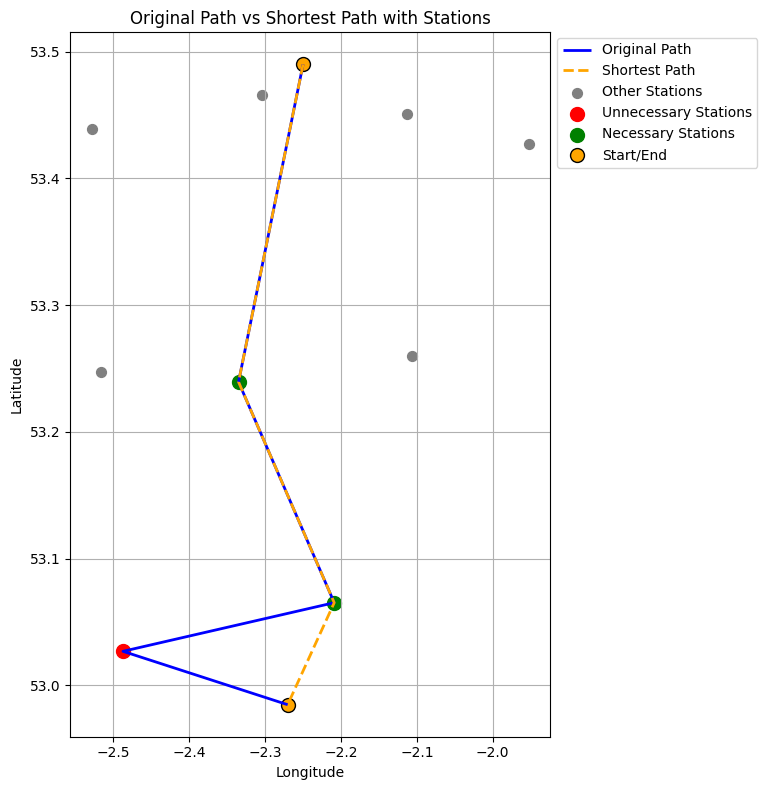

In [46]:
import math
import heapq
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    φ1 = math.radians(lat1)
    φ2 = math.radians(lat2)
    Δφ = math.radians(lat2 - lat1)
    Δλ = math.radians(lon2 - lon1)

    a = math.sin(Δφ / 2)**2 + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

def build_graph(data, stations):
    points = [(data["Latitude"][i], data["Longitude"][i], data["Point"][i]) for i in range(len(data["Point"]))]
    points.extend([(station["lat"], station["lon"], station["id"]) for station in stations])
    
    graph = {}
    for i in range(len(points)):
        lat1, lon1, id1 = points[i]
        for j in range(len(points)):
            if i != j:
                lat2, lon2, id2 = points[j]
                dist = haversine(lat1, lon1, lat2, lon2)
                
                if id1 in data["Point"] and id2 in data["Point"]:
                    idx1 = data["Point"].index(id1)
                    idx2 = data["Point"].index(id2)
                    discharge_distance = data["Discharge Distance"][idx1]
                    
                    if dist <= discharge_distance:
                        if id1 not in graph:
                            graph[id1] = []
                        graph[id1].append((dist, id2))
    
    return graph

def dijkstra(graph, start, end):
    queue = [(0, start, [])]
    seen = set()
    min_dist = {start: 0}
    
    while queue:
        (cost, node, path) = heapq.heappop(queue)
        
        if node in seen:
            continue
        
        path = path + [node]
        seen.add(node)
        
        if node == end:
            return cost, path
        
        for dist, neighbor in graph.get(node, []):
            if neighbor in seen:
                continue
            
            prev = min_dist.get(neighbor, None)
            next_cost = cost + dist
            if prev is None or next_cost < prev:
                min_dist[neighbor] = next_cost
                heapq.heappush(queue, (next_cost, neighbor, path))
    
    return float("inf"), []

def find_shortest_path(data, stations):
    graph = build_graph(data, stations)
    start = data["Point"][0]
    end = data["Point"][-1]
    return dijkstra(graph, start, end)

def extract_points(data, path):
    points = []
    for point in path:
        if isinstance(point, str) and point in data["Point"]:
            idx = data["Point"].index(point)
            points.append((data["Latitude"][idx], data["Longitude"][idx]))
        elif isinstance(point, int) and point in data["Point"]:
            idx = data["Point"].index(point)
            points.append((data["Latitude"][idx], data["Longitude"][idx]))
        else:
            for station in stations:
                if station["id"] == point:
                    points.append((station["lat"], station["lon"]))
                    break
    return points

def plot_paths(data, shortest_path, stations):
    original_path = [(data["Latitude"][i], data["Longitude"][i]) for i in range(len(data["Latitude"]))]
    shortest_path_points = extract_points(data, shortest_path)
    
    # Create GeoDataFrames
    original_path_geom = LineString([(lon, lat) for lat, lon in original_path])
    shortest_path_geom = LineString([(lon, lat) for lat, lon in shortest_path_points])
    
    gdf_original_path = gpd.GeoDataFrame(geometry=[original_path_geom], crs="EPSG:4326")
    gdf_shortest_path = gpd.GeoDataFrame(geometry=[shortest_path_geom], crs="EPSG:4326")
    
    # Stations GeoDataFrame
    stations_geom = [Point(station["lon"], station["lat"]) for station in stations]
    gdf_stations = gpd.GeoDataFrame(geometry=stations_geom, crs="EPSG:4326")
    
    # Include start and end points
    start_lat, start_lon = original_path[0]
    end_lat, end_lon = original_path[-1]
    gdf_start_end = gpd.GeoDataFrame(
        geometry=[Point(start_lon, start_lat), Point(end_lon, end_lat)],
        crs="EPSG:4326",
        data={'Type': ['Start', 'End']}
    )
    
    # Identify common stations between the original path and shortest path
    original_path_station_ids = set()
    for point in original_path:
        for station in stations:
            if math.isclose(point[0], station["lat"], abs_tol=0.0001) and math.isclose(point[1], station["lon"], abs_tol=0.0001):
                original_path_station_ids.add(station["id"])
    
    shortest_path_station_ids = set()
    for point in shortest_path_points:
        for station in stations:
            if math.isclose(point[0], station["lat"], abs_tol=0.0001) and math.isclose(point[1], station["lon"], abs_tol=0.0001):
                shortest_path_station_ids.add(station["id"])
    
    common_station_ids = original_path_station_ids.intersection(shortest_path_station_ids)
    
    # Add a new column to mark station status
    gdf_stations['Path Status'] = gdf_stations.index.to_series().apply(
        lambda idx: 'On Both Paths' if stations[idx]['id'] in common_station_ids
                    else ('On Original Path' if stations[idx]['id'] in original_path_station_ids 
                          else 'Not on Path')
    )
    
    # Filter GeoDataFrames for plotting
    gdf_on_original_path = gdf_stations[gdf_stations['Path Status'] == 'On Original Path']
    gdf_on_both_paths = gdf_stations[gdf_stations['Path Status'] == 'On Both Paths']
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the original path
    gdf_original_path.plot(ax=ax, color='blue', linestyle='-', linewidth=2, label='Original Path')
    
    # Plot the shortest path
    gdf_shortest_path.plot(ax=ax, color='orange', linestyle='--', linewidth=2, label='Shortest Path')
    
    # Plot all stations
    gdf_stations.plot(ax=ax, color='grey', markersize=50, label='Other Stations')
    
    # Highlight stations on the original path in red
    if not gdf_on_original_path.empty:
        gdf_on_original_path.plot(ax=ax, color='red', markersize=100, label='Unnecessary Stations')
    
    # Highlight common stations in green
    if not gdf_on_both_paths.empty:
        gdf_on_both_paths.plot(ax=ax, color='green', markersize=100, label='Necessary Stations')
    
    # Plot the start and end points
    gdf_start_end.plot(ax=ax, color='orange', markersize=100, edgecolor='black', label='Start/End')
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))  # Place legend outside the figure
    plt.title('Original Path vs Shortest Path with Stations')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to fit the figure and the legend
    plt.show()


shortest_distance, shortest_path = find_shortest_path(data, stations)
original_path = data["Point"]
print(f"Shortest distance: {shortest_distance} km")
print(f"Original Path: {original_path}")
print(f"Shortest Path: {shortest_path}")
plot_paths(data, shortest_path, stations)


In [8]:
def parse_duration_to_seconds(duration_str):
    """ Convert a duration string to total seconds. """
    days, hours, minutes, seconds = map(int, re.findall(r'\d+', duration_str))
    total_seconds = days * 86400 + hours * 3600 + minutes * 60 + seconds
    return total_seconds

def seconds_to_duration(seconds):
    """ Convert total seconds to a human-readable duration string. """
    days = seconds // 86400
    seconds %= 86400
    hours = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return f"{days} days {hours} hours {minutes} minutes {seconds} seconds"

# Convert all durations to seconds
durations_in_seconds = [parse_duration_to_seconds(d) for d in data['Duration']]

# Convert total seconds back to timedelta
total_duration_seconds = sum(durations_in_seconds[1:])  # Skip the first "Start" entry
total_duration = seconds_to_duration(total_duration_seconds)

# Calculate total distance
total_distance = sum(data['Distance'][1:])


avg_speed = total_distance * 3600 / total_duration_seconds

print(f"Total Duration: {total_duration}")
print(f"Total Distance: {total_distance:.2f} km")
print(f"Average Speed: {avg_speed:.2f} km/h")

Total Duration: 0 days 0 hours 54 minutes 12 seconds
Total Distance: 63.85 km
Average Speed: 70.69 km/h


In [9]:
# Define the haversine function to calculate distance between two GPS coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    φ1 = math.radians(lat1)
    φ2 = math.radians(lat2)
    Δφ = math.radians(lat2 - lat1)
    Δλ = math.radians(lon2 - lon1)

    a = math.sin(Δφ / 2)**2 + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

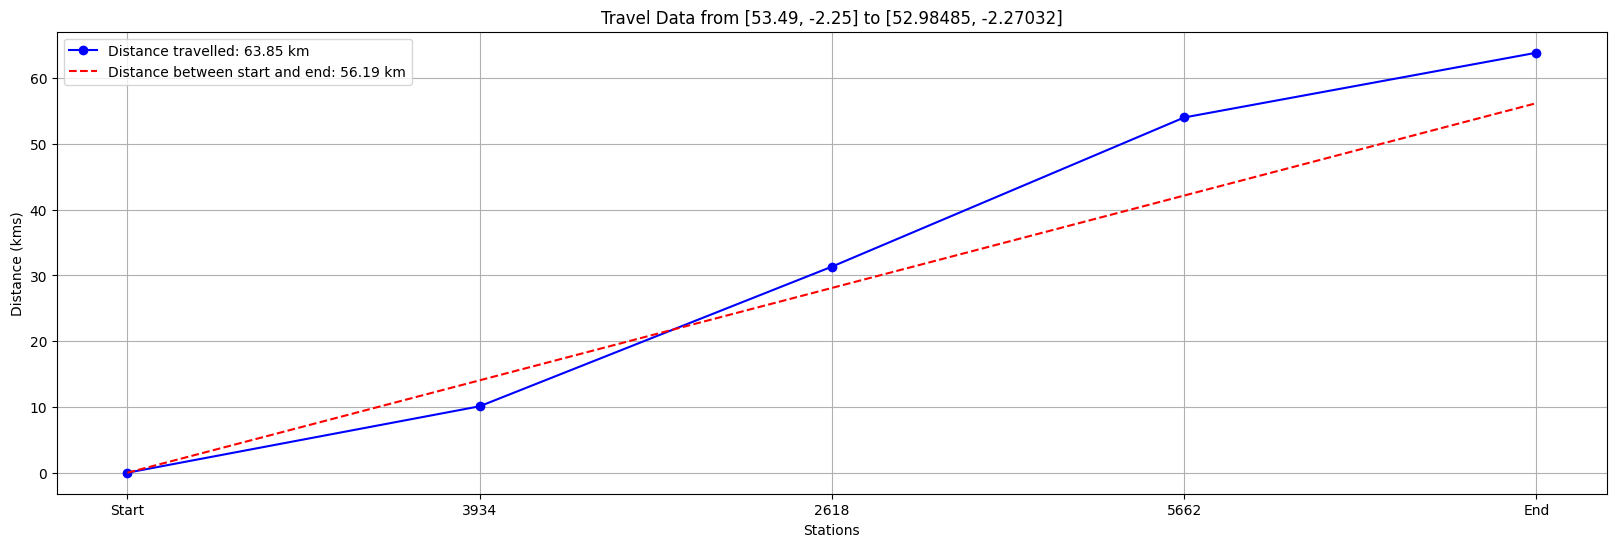

In [10]:
df = pd.DataFrame(data)
df['Point'] = df['Point'].astype(str)

# Calculate Cumulative Distance
df['Cumulative Distance'] = df['Distance'].cumsum()
d = df['Cumulative Distance'].iloc[-1]
# Calculate Haversine Distance from Start to End
start = (df['Latitude'].iloc[0], df['Longitude'].iloc[0])
end = (df['Latitude'].iloc[-1], df['Longitude'].iloc[-1])
haversine_distance = haversine(start[0], start[1], end[0], end[1])

# Plotting
plt.figure(figsize=(20, 6))

# Plot Cumulative Distance
plt.plot(df['Point'], df['Cumulative Distance'], marker='o', label=f'Distance travelled: {d:.2f} km', color='blue')

# Plot Haversine Distance
# Add a point for the start and end
plt.plot([df['Point'].iloc[0], df['Point'].iloc[-1]], [0, haversine_distance], color='red', linestyle='--', label=f'Distance between start and end: {haversine_distance:.2f} km')

plt.xlabel('Stations')
plt.ylabel('Distance (kms)')
plt.title(f'Travel Data from {[start[0], start[1]]} to {[end[0], end[1]]}')
plt.legend()
plt.grid(True)
plt.show()

Shortest path: ['Start', '1825', '5662', 'End']
Length of the shortest path: 59.85 km
The shortest path is valid within discharge distance constraints.


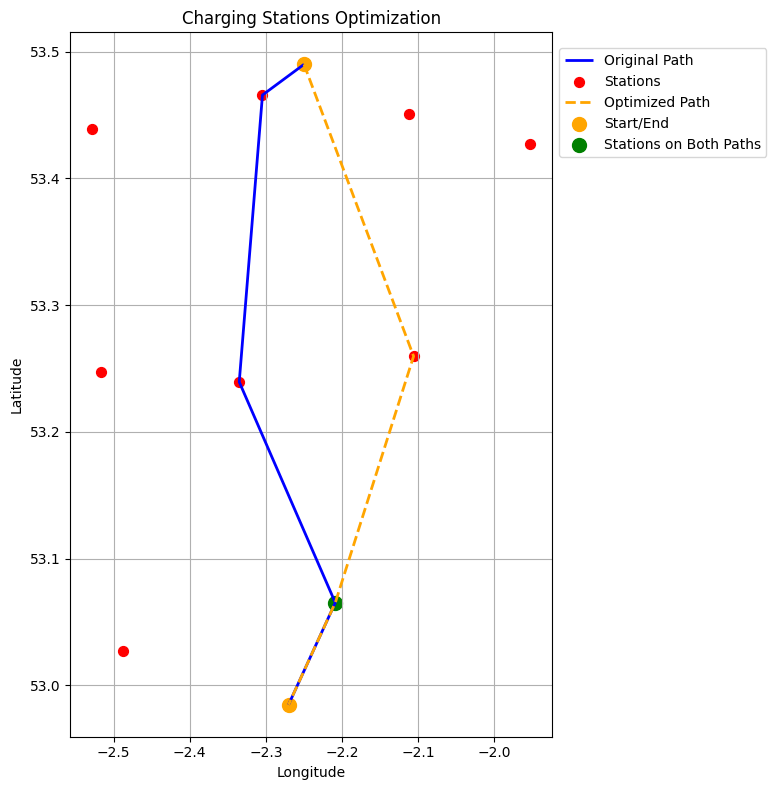

In [11]:

# Create DataFrame for stations
df_stations = pd.DataFrame(stations)
df_stations['id'] = df_stations['id'].astype(str)

# Create the graph
G = nx.Graph()

# Add nodes
for _, row in df_stations.iterrows():
    G.add_node(row['id'], pos=(row['lat'], row['lon']))

# Add start and end nodes to the graph
start_id = "Start"
end_id = "End"
start_lat = data['Latitude'][0]
start_lon = data['Longitude'][0]
end_lat = data['Latitude'][-1]
end_lon = data['Longitude'][-1]

G.add_node(start_id, pos=(start_lat, start_lon))
G.add_node(end_id, pos=(end_lat, end_lon))

# Add edges from start to all stations within discharge distance
for i, row in df_stations.iterrows():
    dist = haversine(start_lat, start_lon, row['lat'], row['lon'])
    if dist <= data['Discharge Distance'][0]:
        G.add_edge(start_id, row['id'], weight=dist)

# Add edges from all stations to end within discharge distance
for i, row in df_stations.iterrows():
    dist = haversine(row['lat'], row['lon'], end_lat, end_lon)
    if dist <= data['Discharge Distance'][-1]:
        G.add_edge(row['id'], end_id, weight=dist)

# Add edges between all pairs of stations if within discharge distance constraints
for i, node1 in df_stations.iterrows():
    for j, node2 in df_stations.iterrows():
        if node1['id'] != node2['id']:
            dist = haversine(node1['lat'], node1['lon'], node2['lat'], node2['lon'])
            # Check if node1 has a corresponding discharge distance value
            try:
                discharge_distance = data['Discharge Distance'][df_stations[df_stations['id'] == node1['id']].index[0]]
            except IndexError:
                continue
            if dist <= discharge_distance:
                G.add_edge(node1['id'], node2['id'], weight=dist)

# Find the shortest path using Dijkstra's algorithm
shortest_path = nx.dijkstra_path(G, start_id, end_id, weight='weight')
shortest_path_length = nx.dijkstra_path_length(G, start_id, end_id, weight='weight')

print(f"Shortest path: {shortest_path}")
print(f"Length of the shortest path: {shortest_path_length:.2f} km")

# Validate the shortest path for discharge distance constraints
valid_path = True
for i in range(len(shortest_path) - 1):
    node1 = shortest_path[i]
    node2 = shortest_path[i + 1]
    pos1 = G.nodes[node1]['pos']
    pos2 = G.nodes[node2]['pos']
    dist = haversine(pos1[0], pos1[1], pos2[0], pos2[1])
    
    try:
        discharge_distance = data['Discharge Distance'][df_stations[df_stations['id'] == node1].index[0]]
    except IndexError:
        discharge_distance = float('inf')  # If not found, assume no discharge constraint

    if dist > discharge_distance:
        valid_path = False
        break

if not valid_path:
    print("The shortest path does not meet discharge distance constraints.")
else:
    print("The shortest path is valid within discharge distance constraints.")

# Plotting Path and Stations
plt.figure(figsize=(12, 8))

# Plot the original path
path_coords = [(lon, lat) for lat, lon in zip(data['Latitude'], data['Longitude'])]
path = LineString(path_coords)
gdf_path = gpd.GeoDataFrame(geometry=[path], crs="EPSG:4326")
gdf_path.plot(ax=plt.gca(), color='blue', linestyle='-', linewidth=2, label='Original Path')

# Plot Stations
gdf_stations = gpd.GeoDataFrame(
    df_stations, geometry=gpd.points_from_xy(df_stations.lon, df_stations.lat), crs="EPSG:4326")
gdf_stations.plot(ax=plt.gca(), color='red', markersize=50, label='Stations')

# Plot the shortest path
shortest_path_coords = []
for node in shortest_path:
    pos = G.nodes[node]['pos']
    shortest_path_coords.append((pos[1], pos[0]))  # lat, lon
shortest_path_line = LineString(shortest_path_coords)
gdf_shortest_path = gpd.GeoDataFrame(geometry=[shortest_path_line], crs="EPSG:4326")
gdf_shortest_path.plot(ax=plt.gca(), color='orange', linestyle='--', linewidth=2, label='Optimized Path')

# Find stations on the original and optimized paths
def stations_on_path(path_coords, stations_df):
    path_line = LineString(path_coords)
    path_stations = []
    for _, station in stations_df.iterrows():
        station_point = Point(station['lon'], station['lat'])
        if path_line.distance(station_point) < 1e-5:  # A small tolerance for floating point comparison
            path_stations.append(station['id'])
    return path_stations

original_path_stations = stations_on_path(path_coords, df_stations)
optimized_path_stations = stations_on_path(shortest_path_coords, df_stations)

# Find stations on both paths
stations_on_both_paths = set(original_path_stations) & set(optimized_path_stations)

# Add markers for stations on the original and optimized paths
df_stations['Path Status'] = np.where(df_stations['id'].isin(stations_on_both_paths), 'On Both Paths', 'Not on Path')

# Plot the start and end points
plt.scatter([start_lon, end_lon], [start_lat, end_lat], color='orange', s=100, label='Start/End')

# Highlight stations on both paths
gdf_on_both_paths = gpd.GeoDataFrame(
    df_stations[df_stations['Path Status'] == 'On Both Paths'], 
    geometry=gpd.points_from_xy(df_stations[df_stations['Path Status'] == 'On Both Paths'].lon, 
                                df_stations[df_stations['Path Status'] == 'On Both Paths'].lat), 
    crs="EPSG:4326")
gdf_on_both_paths.plot(ax=plt.gca(), color='green', markersize=100, label='Stations on Both Paths')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Charging Stations Optimization')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))  # Place legend outside the figure
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit the figure and the legend
plt.show()


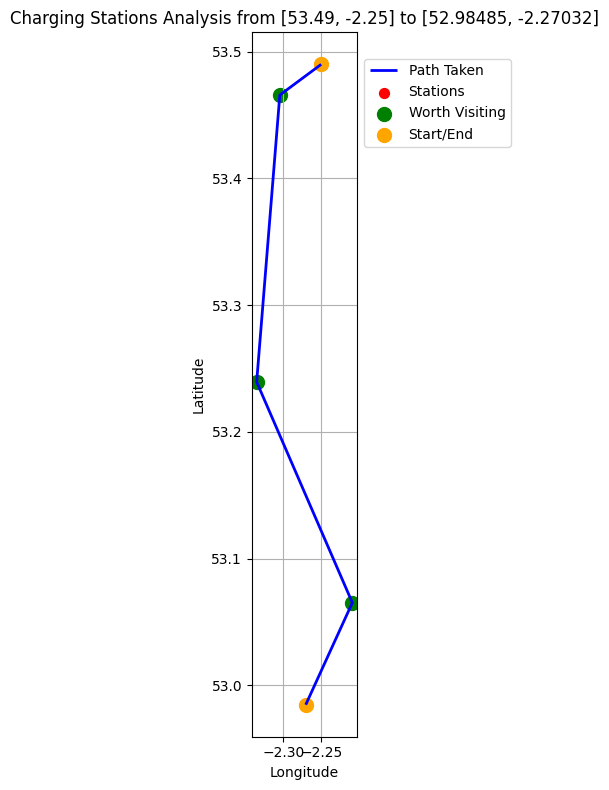

  Point  Battery Left  Battery Usage  Battery Discharge to Next Station  \
0  3934     72.344052      27.655948                          25.246643   
1  2618     44.134575      55.865425                          21.110318   
2  5662     36.228998      63.771002                           0.000000   

   Battery Remaining  Was Worth Visiting  
0          47.097409                True  
1          23.024257                True  
2          36.228998                True  


In [12]:
# Convert Battery Left to numeric
df['Battery Left'] = pd.to_numeric(df['Battery Left'], errors='coerce')

# Filter out start and end points
df_filtered = df[(df['Point'] != "Start") & (df['Point'] != "End")].reset_index(drop=True)

# Assume battery charges to 100% at each station
df_filtered['Battery Left'] = df_filtered['Battery Left'].fillna(100)

# Calculate Battery Usage
df_filtered['Battery Usage'] = 100 - df_filtered['Battery Left']

# Calculate Battery Usage Efficiency
df_filtered['Battery Usage Efficiency (%)'] = df_filtered['Battery Usage'] / df_filtered['Distance'].replace(0, pd.NA) * 100

# Calculate distance to next station
df_filtered['Next Latitude'] = df_filtered['Latitude'].shift(-1)
df_filtered['Next Longitude'] = df_filtered['Longitude'].shift(-1)

df_filtered['Distance to Next Station (km)'] = df_filtered.apply(
    lambda row: haversine(row['Latitude'], row['Longitude'], row['Next Latitude'], row['Next Longitude']) 
    if pd.notna(row['Next Latitude']) else pd.NA, axis=1
)
start = (df['Latitude'].iloc[0], df['Longitude'].iloc[0])
end = (df['Latitude'].iloc[-1], df['Longitude'].iloc[-1])
# Determine if the station visit was worth it
df_filtered['Battery Discharge to Next Station'] = df_filtered['Distance to Next Station (km)'].fillna(0)  # Assume 0 if no next station
df_filtered['Battery Remaining'] = df_filtered['Battery Left'] - df_filtered['Battery Discharge to Next Station']

# Evaluate if visiting each station was worth it
df_filtered['Was Worth Visiting'] = df_filtered['Battery Remaining'] >= 0

# Plotting Path and Stations
plt.figure(figsize=(12, 8))

# Plot the path taken
path_coords = [(lon, lat) for lat, lon in zip(df['Latitude'], df['Longitude'])]
path = LineString(path_coords)
gdf_path = gpd.GeoDataFrame(geometry=[path], crs="EPSG:4326")
gdf_path.plot(ax=plt.gca(), color='blue', linestyle='-', linewidth=2, label='Path Taken')

# Plot Stations
gdf_stations = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")
gdf_stations.plot(ax=plt.gca(), color='red', markersize=50, label='Stations')

# Highlight stations worth visiting
worth_visiting = df_filtered[df_filtered['Was Worth Visiting']]
gdf_worth_visiting = gpd.GeoDataFrame(
    worth_visiting, geometry=gpd.points_from_xy(worth_visiting.Longitude, worth_visiting.Latitude), crs="EPSG:4326")
gdf_worth_visiting.plot(ax=plt.gca(), color='green', markersize=100, label='Worth Visiting')

start_end = df[(df['Point'] == "Start") | (df['Point'] == "End")]
gdf_start_end = gpd.GeoDataFrame(
    start_end, geometry=gpd.points_from_xy(start_end.Longitude, start_end.Latitude), crs="EPSG:4326")
gdf_start_end.plot(ax=plt.gca(), color='Orange', markersize=100, label='Start/End')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Charging Stations Analysis from {[start[0], start[1]]} to {[end[0], end[1]]}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))  # Place legend outside the figure
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit the figure and the legend
plt.show()

# Print the DataFrame with Battery Usage Analysis
print(df_filtered[['Point', 'Battery Left', 'Battery Usage', 'Battery Discharge to Next Station', 'Battery Remaining', 'Was Worth Visiting']])
